In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Rice_Citation_Request.txt
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (11154).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8058).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (5150).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8267).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8747).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (2970).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (10959).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (4976).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (730).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (9279).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (534).jpg
/kaggle/i

In [2]:
import cv2
import matplotlib.pyplot as plt
import requests
from PIL import Image

processing first image using pillow

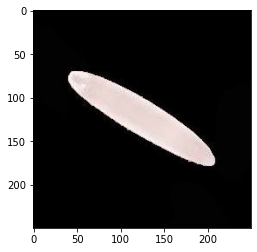

In [3]:
img=cv2.imread('/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati/basmati (10).jpg')
plt.imshow(img)

In [4]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

viewing the shape of the image

In [5]:
img.shape

(250, 250, 3)

size of the image in terms of pixels

In [6]:
img.size

187500

grayscaling said image

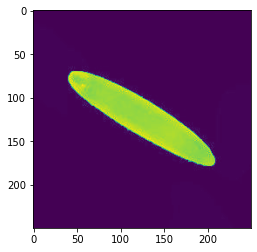

In [7]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

In [8]:
gray_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
gray_img.shape

(250, 250)

In [10]:
gray_img.size

62500

viewing the different color sets of the rgb for the image

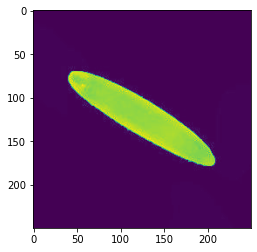

In [11]:
b, g, r = cv2.split(img)
img = cv2.merge((b,g,r))
plt.imshow(g)

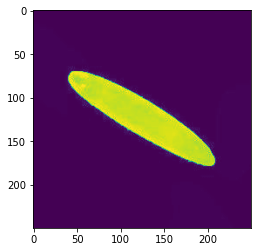

In [12]:
plt.imshow(b)

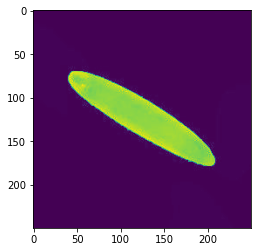

In [13]:
plt.imshow(r)

cropping the image

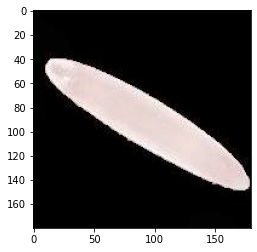

In [14]:
img1=img[30:210,30:210]
plt.imshow(img1)

using a mixture of 2 colours

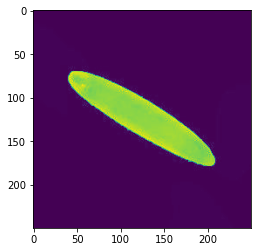

In [15]:
img1=img[:,:,2]
plt.imshow(img1)

rotating the image about its centre

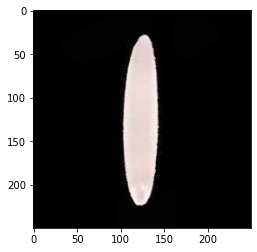

In [16]:
height, width = img.shape[:2]
center = (width/2, height/2)

rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=120, scale=1)
rotated_image = cv2.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))
plt.imshow(rotated_image)

Now next is image translation, where will push the image diagonally down.



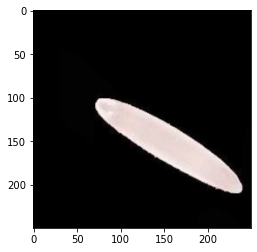

In [17]:
tx, ty = width /8, height /8

translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty]
], dtype=np.float32)

translated_image = cv2.warpAffine(src=img, M=translation_matrix, dsize=(width, height))

plt.imshow(translated_image)

using the canny algorithm to detect edges

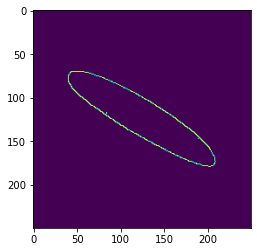

In [18]:
# Canny algorithm
edges = cv2.Canny(img,100,500,True)
plt.imshow(edges)

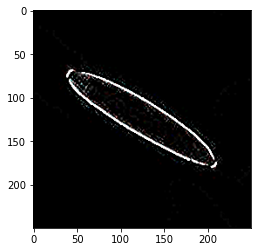

In [19]:
sobel_edge = cv2.Sobel(src=img, ddepth=cv2.CV_16U, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
plt.imshow(sobel_edge)

creating a binary image

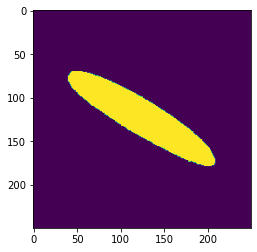

In [20]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
plt.imshow(thresh)

using the binary image to detect contours

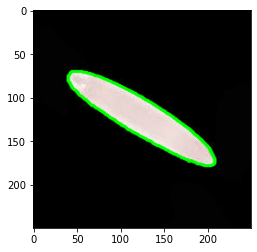

In [21]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# See the results
plt.imshow(img)

Above we can see how the contours have been generated. The contour has been generated well for both background and foreground objects.